# Тимошенко Анна (дата-аналитик)
# Задание #1 Numpy
## Инструменты для выполнения задания

### Jupyter Notebook
  * [Three Things I Love About Jupyter Notebooks](http://blog.kaggle.com/2015/12/07/three-things-i-love-about-jupyter-notebooks/)
  * [Jupyter Notebook Users Manual](http://jupyter.cs.brynmawr.edu/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb)
  * [Продвинутые трюки с jupyter часть 1](http://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/)
  * [Продвинутые трюки с jupyter часть 2](http://blog.dominodatalab.com/interactive-dashboards-in-jupyter/)
  * [Галерея интересных ноутбуков](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

### Библиотеки Python

  * [NumPy](http://www.numpy.org/)
    - [Tutorial Brief](http://nbviewer.jupyter.org/github/twistedhardware/mltutorial/blob/master/notebooks/IPython-Tutorial/4%20-%20Numpy%20Basics.ipynb)
    - [Scipy Lecture Notes](http://www.scipy-lectures.org/). 
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — эмуляция функционала графопостроений в Matlab
    - [галерея примеров](http://matplotlib.org/gallery.html)
  * [skimage](http://scikit-image.org/)

## Разминка
1. Создайте список (list) и массив (ndarray), содержащие числа от 0 до 100 000 000.

In [1]:
import numpy as np
from numpy import flipud
import time
import matplotlib.pyplot as plt
import matplotlib

from skimage import io
from skimage import util
from skimage.filters import threshold_otsu
from skimage.transform import rotate

In [2]:
li = list(range(100000001))
narr = np.arange(100000001)

2. Напишите функцию, которая вычисляет сумму всех элементов массива, используя цикл for.

In [3]:
def sum_all_elements(arr):
    sum_all = 0
    for i in range(len(arr)):
        sum_all += arr[i]
    return sum_all

3. Замерьте: время выполнения этой функции на списке и на массиве, время выполнения функции sum() на списке и на массиве, время выполнения функции numpy.sum() на списке и на массиве.

In [4]:
%%time
# можно использовать встроенную "магию" Jupyter notebook, но она не очень точная
sum_all_elements(li)

Wall time: 4.45 s


5000000050000000

In [5]:
# в условии не говорится, надо ли печатать или выводить результат выполнения функции, так что буду выводить только время
start_time = time.time()
sum_all_elements(li)
time.time() - start_time

4.576125621795654

In [6]:
%%capture timeit
%%timeit
# ещё более точный вариант, но долго измеряет (несколько подходов)
sum_all_elements(li)

In [7]:
print(timeit)

4.51 s +- 67.2 ms per loop (mean +- std. dev. of 7 runs, 1 loop each)



In [8]:
%%capture timeit
%%timeit
sum_all_elements(narr)

In [9]:
print(timeit)

10.4 s +- 206 ms per loop (mean +- std. dev. of 7 runs, 1 loop each)



In [10]:
%%capture timeit
%%timeit
sum(li)

In [11]:
print(timeit)

1.62 s +- 36.6 ms per loop (mean +- std. dev. of 7 runs, 1 loop each)



In [12]:
%%capture timeit
%%timeit
sum(narr)

In [13]:
print(timeit)

5.16 s +- 21.7 ms per loop (mean +- std. dev. of 7 runs, 1 loop each)



In [14]:
%%capture timeit
%%timeit
np.sum(li)

In [15]:
print(timeit)

4.57 s +- 22.9 ms per loop (mean +- std. dev. of 7 runs, 1 loop each)



In [16]:
%%capture timeit
%%timeit
np.sum(narr)

In [17]:
print(timeit)

33.8 ms +- 890 us per loop (mean +- std. dev. of 7 runs, 10 loops each)



4. Объясните полученные результаты. **Везде далее запрещено использовать циклы.** *Numpy имеет большинство необходимых функций для операций над тензорами, например [Numerical operations on arrays](http://www.scipy-lectures.org/intro/numpy/operations.html).*

Ответ очень длинный, связан с тем, как именно написана библиотека numpy, что она специально разработана для скоростной обработки массивов. Естественно, что функции разработанные специально для списков, либо для numpy-массивов наилучшим образом работают именно с ними, поэтому мы получаем лучше время sum(li), чем sum(narr) и соответственно np.sum(narr) значительно быстрее np.sum(li), но при этом sum(li) быстрее, чем np.sum(li). Замедление при работе с "чужеродным" списком np.sum связано с тем, что в этом случае выполняется преобразование типов, и в противоположном случае тоже.

А написанная мной функция работает хуже всех!

5. Загрузите и  выведите на экран картинку autodoc.png. *Используйте библиотеки skimage и matplotlib.*

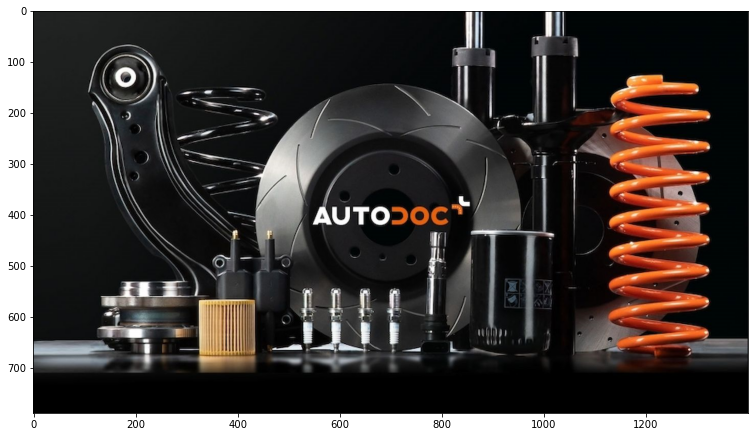

In [22]:
image = io.imread('autodoc.png')
plt.figure(figsize=(12.8, 9.6))
plt.imshow(image)

plt.show()

6. Получите и интерпретируйте размеры картинки.

In [23]:
image.shape

(788, 1400, 4)

788 - это высота в пикселях

1400 - это ширина в пикселях

Последнее число - 4 - означает количество каналов, в .png файлах обычно 4 канала - для красного, зелёного и синего цветов, а также для прозрачности. Последний канал также называют альфа-канал.

7. Выведите верхнюю и левую половины изображения. 

8. Выведите произвольный прямоугольник изображения.

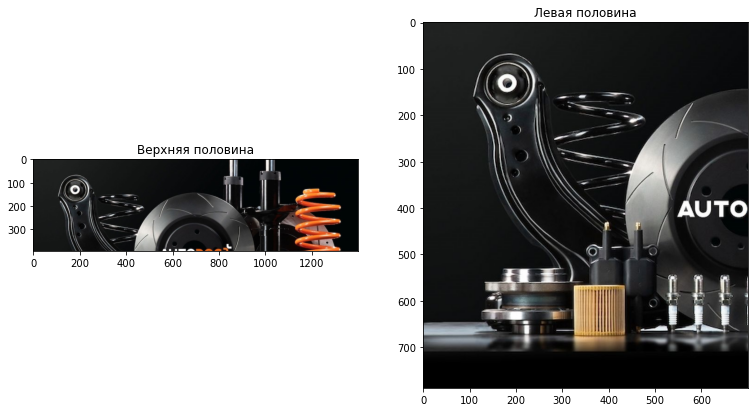

In [24]:
top_half = image[0:round(image.shape[0] / 2), 0:image.shape[1]]
left_half = image[0:image.shape[0], 0:round(image.shape[1]/2)]

plt.figure(figsize=(12.8, 9.6))

plt.subplot(121), plt.imshow(top_half)
plt.title('Верхняя половина')
plt.subplot(122), plt.imshow(left_half)
plt.title('Левая половина')

plt.show()

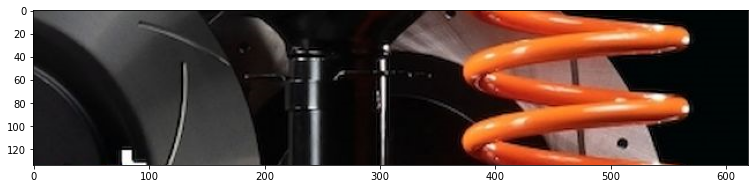

In [25]:
# для произвольного прямоугольника возьмём случайную точку для каждого угла 
import random
random.seed(3)
# координата верхней границы произвольного прямоугольника
a = random.randint(0, (image.shape[0]-1)) #оставим 1 пиксель для нижней границы
b = random.randint(a+1, image.shape[0])
# те же манипуляции для левой и правой границ
c = random.randint(0, (image.shape[1]-1)) #оставим 1 пиксель для правой границы
d = random.randint(c+1, image.shape[1])
plt.figure(figsize=(12.8, 9.6))
plt.imshow(image[a:b, c:d])

plt.show()

In [26]:
# посмотрим какие координаты были случайно выбраны
print(a, b, c, d)

243 377 757 1376


9. Выведите каждый канал изображения отдельно.

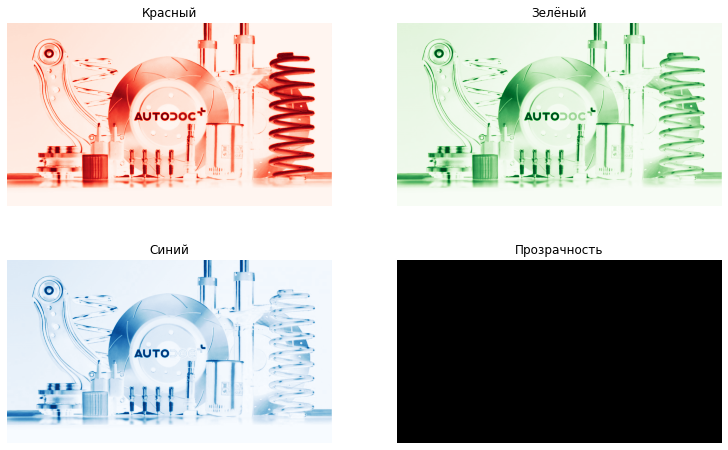

In [27]:
red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]
alpha = image[:, :, 3]

plt.figure(figsize=(12.8, 8))
plt.subplot(221), plt.imshow(red, cmap='Reds')
# далее будем показывать картинки без линеек и границ
plt.axis('off')
plt.title('Красный')
plt.subplot(222), plt.imshow(green, cmap='Greens')
plt.axis('off')
plt.title('Зелёный')
plt.subplot(223), plt.imshow(blue, cmap='Blues')
plt.axis('off')
plt.title('Синий')
plt.subplot(224), plt.imshow(alpha, cmap='gray')
plt.axis('off')
plt.title('Прозрачность')

plt.show()

10. Получите черно-белое изображение путем усреднения по каналам. *Сначала самостоятельно реализуйте усреднение, затем правильно воспользуйтесь функцией numpy.mean()* 

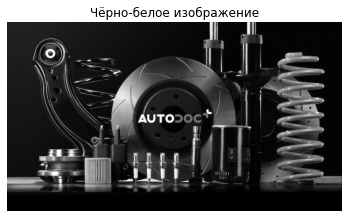

In [28]:
gray_image = image[:, :, 0] * 0.33 + image[:, :, 1] * 0.33 + image[:, :, 2] * 0.33

plt.axis('off')
plt.imshow(gray_image, cmap = 'gray')
plt.title('Чёрно-белое изображение')

plt.show()

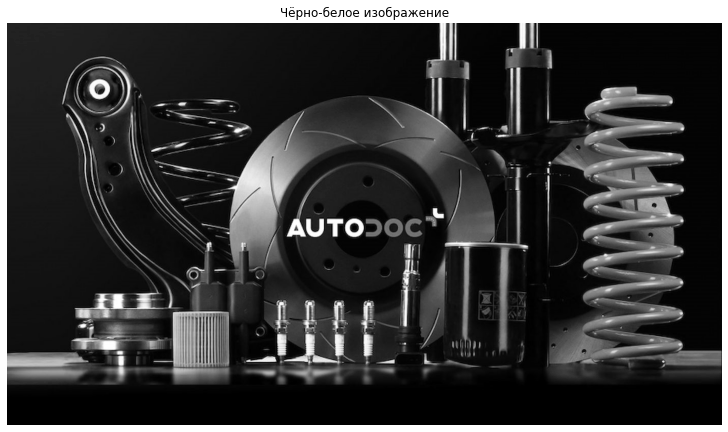

In [29]:
gray_image = np.mean(image, axis=2)

plt.figure(figsize=(12.8, 8))
plt.axis('off')
plt.imshow(gray_image, cmap = 'gray')
plt.title('Чёрно-белое изображение')

plt.show()

Здесь нужно добавить, что правильнее использовать коэффициенты для цветовых каналов, [по ссылке](https://e2eml.school/convert_rgb_to_grayscale.html) приводятся различные варианты с аргументацией, реализуем наиболее популярный 

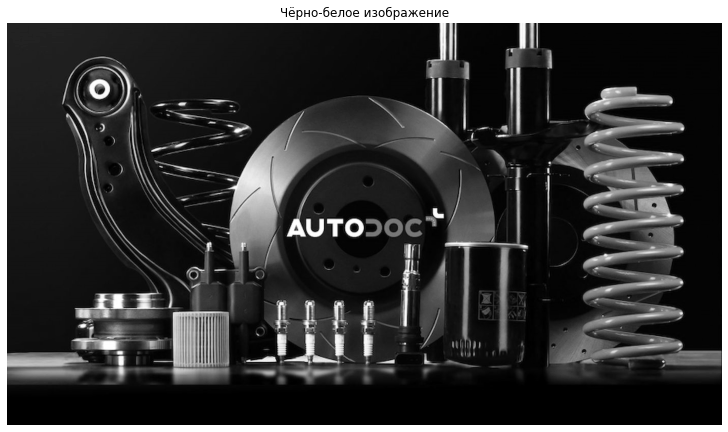

In [30]:
gray_image = image[:, :, 0] * 0.2126 + image[:, :, 1] * 0.7152 + image[:, :, 2] * 0.0722

plt.figure(figsize=(12.8, 8))
plt.axis('off')
plt.imshow(gray_image, cmap = 'gray')
plt.title('Чёрно-белое изображение')

plt.show()

11. Получите негатив для черно-белого изображения.

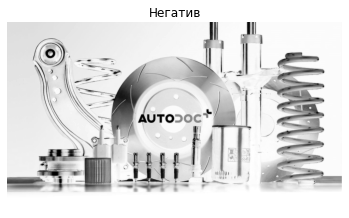

In [31]:
inverted_gray_image = util.invert(gray_image)

plt.axis('off')
plt.imshow(inverted_gray_image, cmap = 'gray')
plt.title('Негатив')

plt.show()

12. Бинаризуйте черно-белое изображение по некоторому порогу.

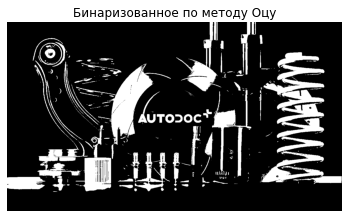

In [32]:
thresh = threshold_otsu(gray_image)
binary = gray_image > thresh

plt.axis('off')
plt.imshow(binary, cmap = 'gray')
plt.title('Бинаризованное по методу Оцу')

plt.show()

13. Уменьшите цветное изображение в 2 раза. *Используйте самый элементарный способ*.

Вопрос в том, что мы понимаем под уменьшением изображения в 2 раза?

Если длины сторон уменьшаются в 2 раза, то площадь картинки уменьшается в 4 раза.
Ниже приведён именно такой способ

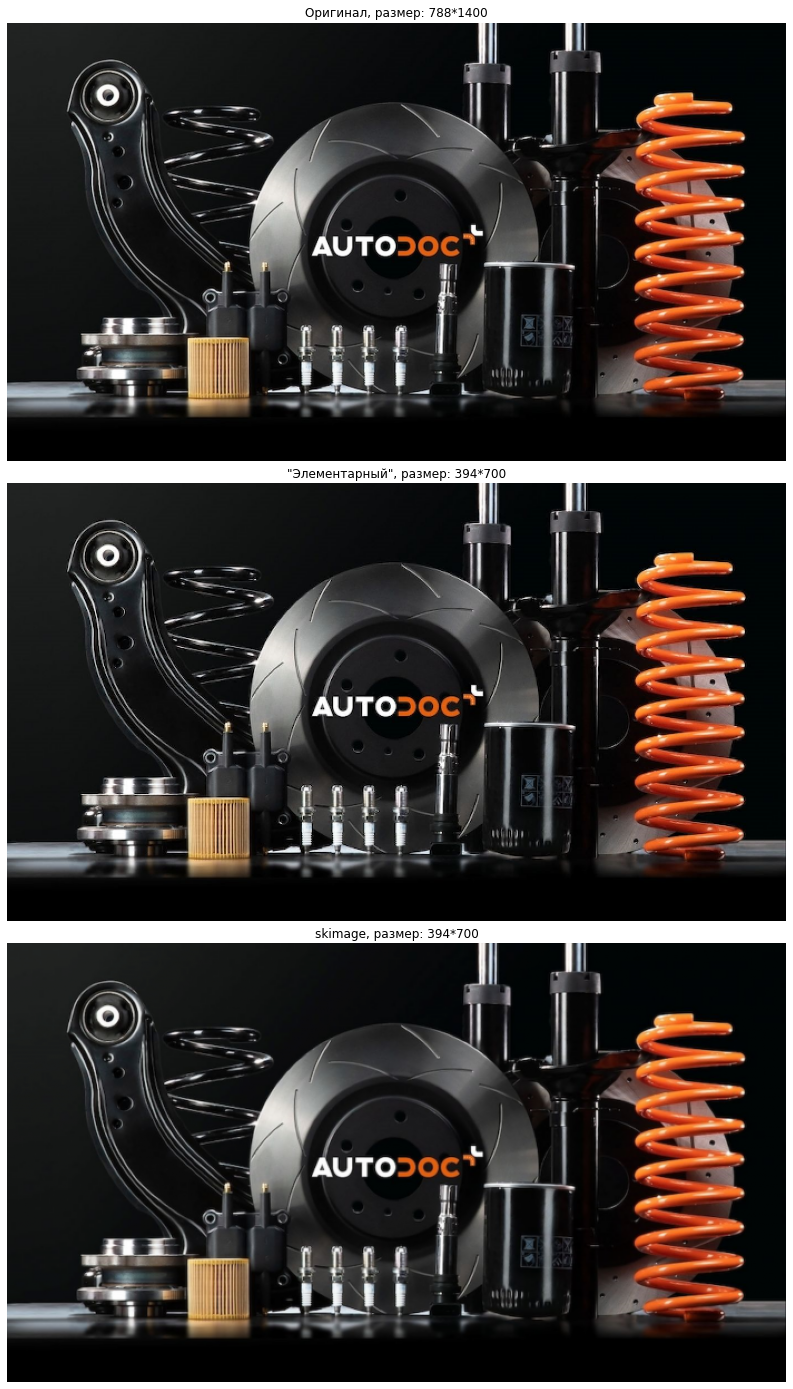

In [33]:
# элементарный способ
small_image = image[::2, ::2]
# используя функцию библиотеки skimage
from skimage.transform import resize
image_resized = resize(image, (image.shape[0] // 2, image.shape[1] // 2), anti_aliasing=True)

plt.subplots(3, 1, gridspec_kw = {'wspace':0, 'hspace':0.05}, figsize=(15,25))
plt.subplot(311), plt.imshow(image)
plt.axis('off')
plt.title(label = 'Оригинал, размер: ' + str(image.shape[0]) + '*' + str(image.shape[1]))
plt.subplot(312), plt.imshow(small_image)
plt.axis('off')
plt.title('"Элементарный", размер: ' + str(small_image.shape[0]) + '*' + str(small_image.shape[1]))
plt.subplot(313), plt.imshow(image_resized)
plt.axis('off')
plt.title('skimage, размер: ' + str(image_resized.shape[0]) + '*' + str(image_resized.shape[1]))

plt.show()

Визуально на таком размере демонстрируемой картинки (Figure size) разница почти не заметна, если же мы уменьшим картинку таким образом, чтобы её площадь уменьшилась в 2 раза, то разница будет заметна ещё меньше

14. Отразите цветное изображение по любой из осей.
15. Поверните на 90 градусов и отразите цветное изображение за константное время.

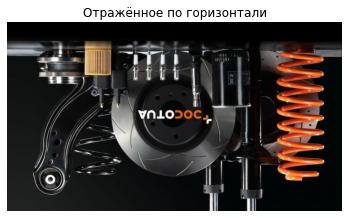

In [37]:
flipped_hor = np.flipud(image)

plt.axis('off')
plt.imshow(flipped_hor)
plt.title('Отражённое по горизонтали')

plt.show()

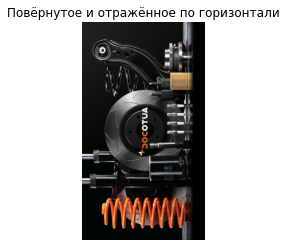

In [38]:
# можно для поворота использовать встроенную функцию библиотеки skimage
rotated90 = rotate(image, angle=90, resize=True)
flipped_hor_rotated90 = np.flipud(rotated90)

plt.axis('off')
plt.imshow(flipped_hor_rotated90)
plt.title('Повёрнутое и отражённое по горизонтали')

plt.show()

Впрочем, [нагуглен](https://stackoverflow.com/questions/69886416/what-is-the-fastest-way-to-rotate-image-in-python) более быстрый способ поворота картинки

Сравним:

In [39]:
%%timeit
rotated90 = rotate(image, angle=90, resize=True)
flipped_hor_rotated90 = np.flipud(rotated90)

234 ms ± 7.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%%timeit
rotated_np = np.rot90(image)
flipped_hor_rotated_np = np.flipud(rotated_np)

6.79 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


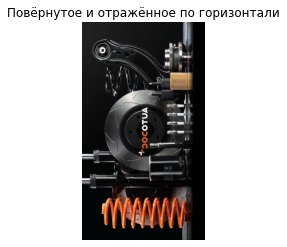

In [41]:
# отобразим результат
rotated_np = np.rot90(image)
flipped_hor_rotated_np = np.flipud(rotated_np)

plt.axis('off')
plt.imshow(flipped_hor_rotated_np)
plt.title('Повёрнутое и отражённое по горизонтали')

plt.show()

16. Преобразуйте картинку в матрицу, где строка - это пиксель изображения, а столбцы - это кординаты и значение RGB этого пикселя.

Изображения в библиотеке scikit-image представлены в виде numpy-массивов, поэтому нам нужно просто преобразовать имеющийся массив

In [42]:
# Так как в задании речь идёт об RGB, удалим значения alpha канала
no_alpha_image = image[:,:,:3]

In [43]:
# Для получения координат используем функцию meshgrid
x, y = np.meshgrid(range(image.shape[1]), range(image.shape[0]))

In [44]:
# Результат:
np.concatenate([x.reshape(-1, 1), y.reshape(-1, 1), no_alpha_image.ravel().reshape(-1, 3)], axis=1)

array([[   0,    0,   33,   35,   34],
       [   1,    0,   33,   35,   34],
       [   2,    0,   33,   35,   34],
       ...,
       [1397,  787,    0,    0,    0],
       [1398,  787,    0,    0,    0],
       [1399,  787,    0,    0,    0]])

## Оформление
Изучите и строго следуйте [PEP 8 Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/). Используйте возможности jupyter notebook для оформления отчета. Оформление кода и задачи в целом также учитывается.